### Introduction to MLOps
* Overview
  + rule of 25
    + 25% effort goes to DevOps
    + 25% effort goes to data operations to automate data
    + 25% effort goes to modeling and improving modeling
    + 25% effort goes to framing or looking at business requirements
  + Trends and techniques
    + production first mindset
      + everything related to the product system needs to be automated
* what is devops: combination of 
  + checklist of software engineering best practice
  + culture of continuous improvement
  + CI/CD, infrastructure as a code for automation
* DataOps
  + apply the same principles of devops to data and data systems
  + constantly make improvements (data more cleaner)
  
* cloud programming on github codebase environment
  + set up virtual environment by 
  `virtualenv ~/.venv
    source ~/.venv/bin/activate`
  + set up the reference to the virtual environment by`vim ~/.bashrc`
    + shift g to go to the end of the file, and add `source ~/.venv/bin/activate`
  + create Makefile by `touch Makefile`
  + create requirments.txt by `touch requirements.txt`
  + create a python file such as hello.py and its test file `test_hello.py`
  + scafold of Makefile
  ```Shell
  install:
    pip install --upgrade pip &&\
        pip install -r requirements.txt
        
  test:
    python -m pytest -vv test_hello.py
    
  format:
    black *.py
    
  lint:
    pylint --disable=R, C hello.py
    
  all: install lint test format
  ```
 + requirements.txt
  `pytest
   pytest-cov
   pylint
   black
   ipython`
   
 + using ipython as a debug tool for your code  
   + activate ipython by typing ipython in terminal
   + import the function you want to check by `from hello import more_hello` where hello is the .py file and `more_hello` is the function in the file
     + you can use pytest grammar such as `assert "h1" == more_hello()` 

### Continuous Delivery (CD)
* use a cloud native environment can provide a similar environment to your prod system
* you push the code and Infrastructure as code (IAC) to the cloud environment to provision the resources and change code
* source control repo will trigger build system component to test the code and merge code
* build system will then create/mutate/delete infrastructure (IAC) will make sure the states of infrastructure is idempotent

### Feature Store
* data warehouse vs feature store
  + data lake contains raw data including a variety of source data, such as streaming data, batch data, structured and unstructured data
  + one way to use the data is the featurization that transform the data to reusable, high quality ML inputs in feature store
    + the high quality data in feature store can be used to train models and make predictions, being audited and extract relationships between features
  + another way is to use ETL to transform data data in data warehouse as reusable, high-quality BI inputs for building reporting, dashboards and BI systems
  
### Data Drift
* when data drifts constantly, it is difficult to build an efficient model. Therefore, retraining the model is usually necessary

### Operationalizing a microservice
* ![image.png](attachment:image.png)
* microservice style: 
  + git code can be used as
    + small reusable code
    + CLI
    + library
    + microservice service
    + container
  + we can build microservice in stage environment using CD build server to execute lint test, compile, and deploy (IAC)
    + stage environment can collect health metrics such as CPU, memory and latency by metrics and monitoring system
    + it can also have performance verification for loadtesting
  + if the stage environment test is passed, we can easily create "N" microservice environments in prod environment
  
### CI for microservices
* local prod environment (manually)
  + set up test, lint and format processes by makefile and use build server to automate the operations
  
### End to End MLOps HuggingFace Spaces
* ![image-2.png](attachment:image-2.png)
* in hugging face, create a authentication token to be used in github codespace and github actions
* github pull hugging face models from hugging Face, and goes to hugging Face spaces and uses Gradio App for text summarization

#### Hugging face
* in hugging face, models contain a lot of pre-trained models
* in spaces, you can deploy your apps
* first, create a space, call it demo2, and select Gradio as the SDK
* after the space is created, copy the git clone command
* go to github repo, and create a new repo and name it as hugging-face-demo2. Add a readme file and .gitignore template for python
* in github -> code, select "Configure and create codespace", which allows you to select machine tyhpe with more memory and storage
* create a scafold of the project, including
  + a virtual environment (create by `virtualenv ~/.venv`)
  + complile ~/.bashrc by `vim ~/.bashrc` and add `source ~/.venv/bin/activate` at the end of the file. This will load the virtual environment every time you open a shell
  + create requirements.txt, app.py and Makefile by touch from terminal
  + copy and paste Makefile template to Makefile
  + edit the requirements.txt for packages
    + gradio, transformers, and tensorflow
  + in app.py add
  ```python
    from transformers import pipeline
    import gradio as gr
    
    model = pipeline("summarization")
    
    def predict(prompt):
        summary = model(prompt)[0]["Summary_text"]
        return summary
    
    with gr.Blocks() as demo:
        textbox = gr.Textbox(placeholder="Enter text block to summarize", lines=4)
        gr.Interface(fn=predict, inputs=textbox, outputs="text")
        
    demo.launch()
    
  ```
  + type `make install` to install packages
  
* set up hugging face
  + in hugging face, select your profile, and settings
  + create a new access token in "Access Token" section. Select the role of write, and name it github-actions-deploy
  + copy the token, and go to the repo, and go to settings, got to Secrets/actions, and create new repo secret. Paste the value there and name it HG
  
* set up workflow in git repo

### fastAPI
* in AWS cloud9 / app runner
* noahgift/fastapi (https://github.com/noahgift/fastapi)

### Makefile
* check the version of make version by `which make`. This works on both Linux and windows
* create Makefile using touch Makefile
* content of the Makefile is the shell commands with sections defined by string and :
  ```
    hello
        echo "this is my first make command"
  ```    

### Three most important files in a python project
* Makefile: automate pipelines as a recipe
* Dockerfile: provides runtime
* requirements.txt: for python package requirement

## Data science

### Data science structure
* Ingest
* EDA
* modeling
* conclusion

### A typical process
* start a new github repo
* select README and .gitignore options and create the repo
* edit README file using markdown
* to run the code, you can use either github codespace or google colab. Colab can be connected to github
* a common workflow is to run Makefile for install, test and deploy, and then use GitHub Actions to push code to Amazon ECR, then use App Runner to deploy the code to FastAPI

### test notebook
* how to hook colab notebook with github
* in github, set up Makefile to test notebook using `python -m pytest --nbval notebook.ipynb`
* convert the Makefile to action workflow of github. Each time when you push a change to your notebook, the build process will automatically run and validate your notebook

### Github workspace template
* microsoft / codespaces-teaching-template-py 

### Practice systems
* 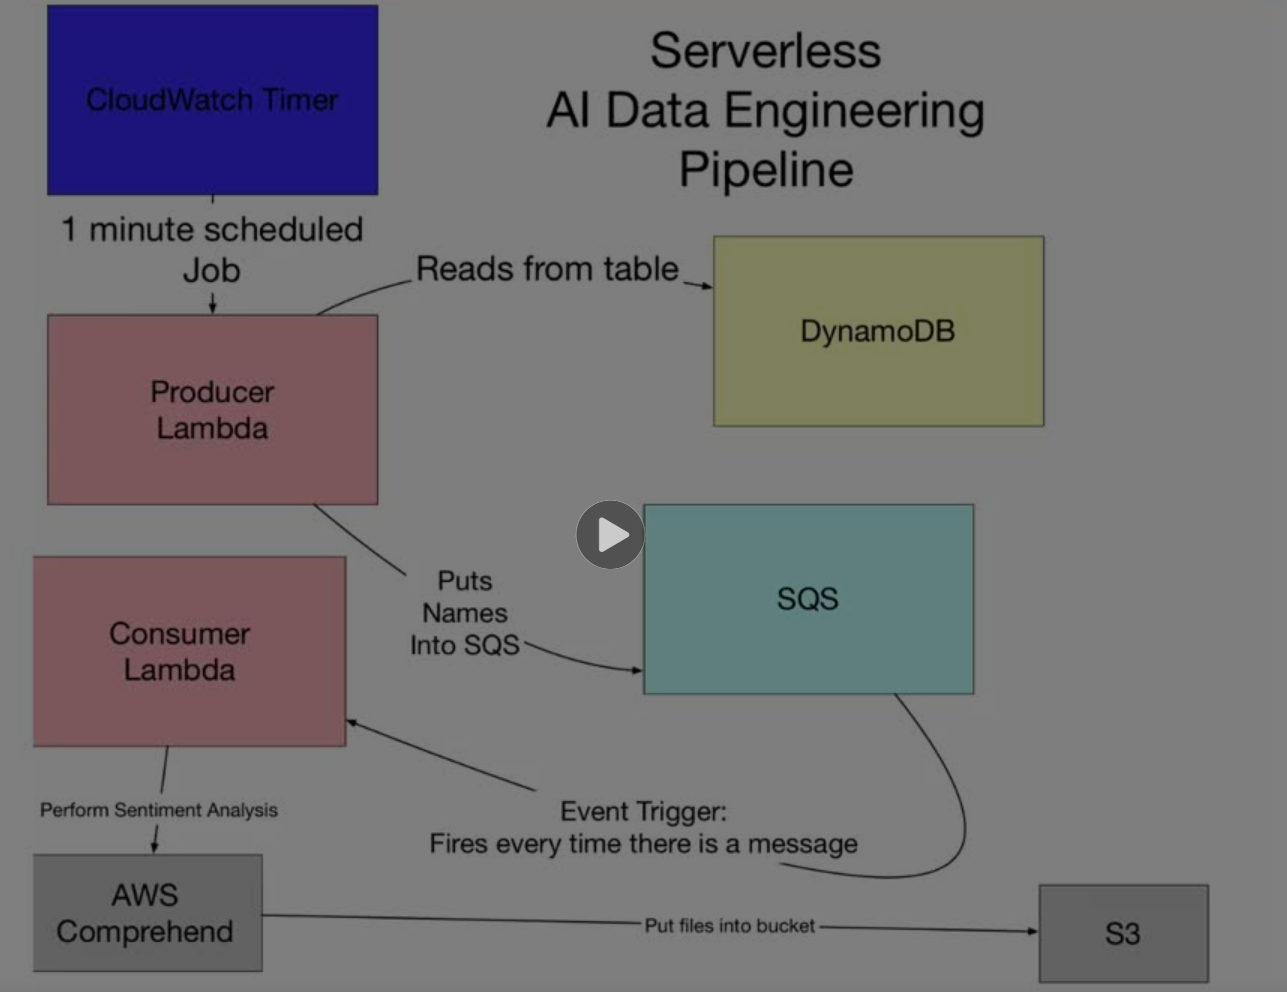
* [real-time file processing](https://github.com/aws-samples/lambda-refarch-fileprocessing)


### Containerized microservices
* 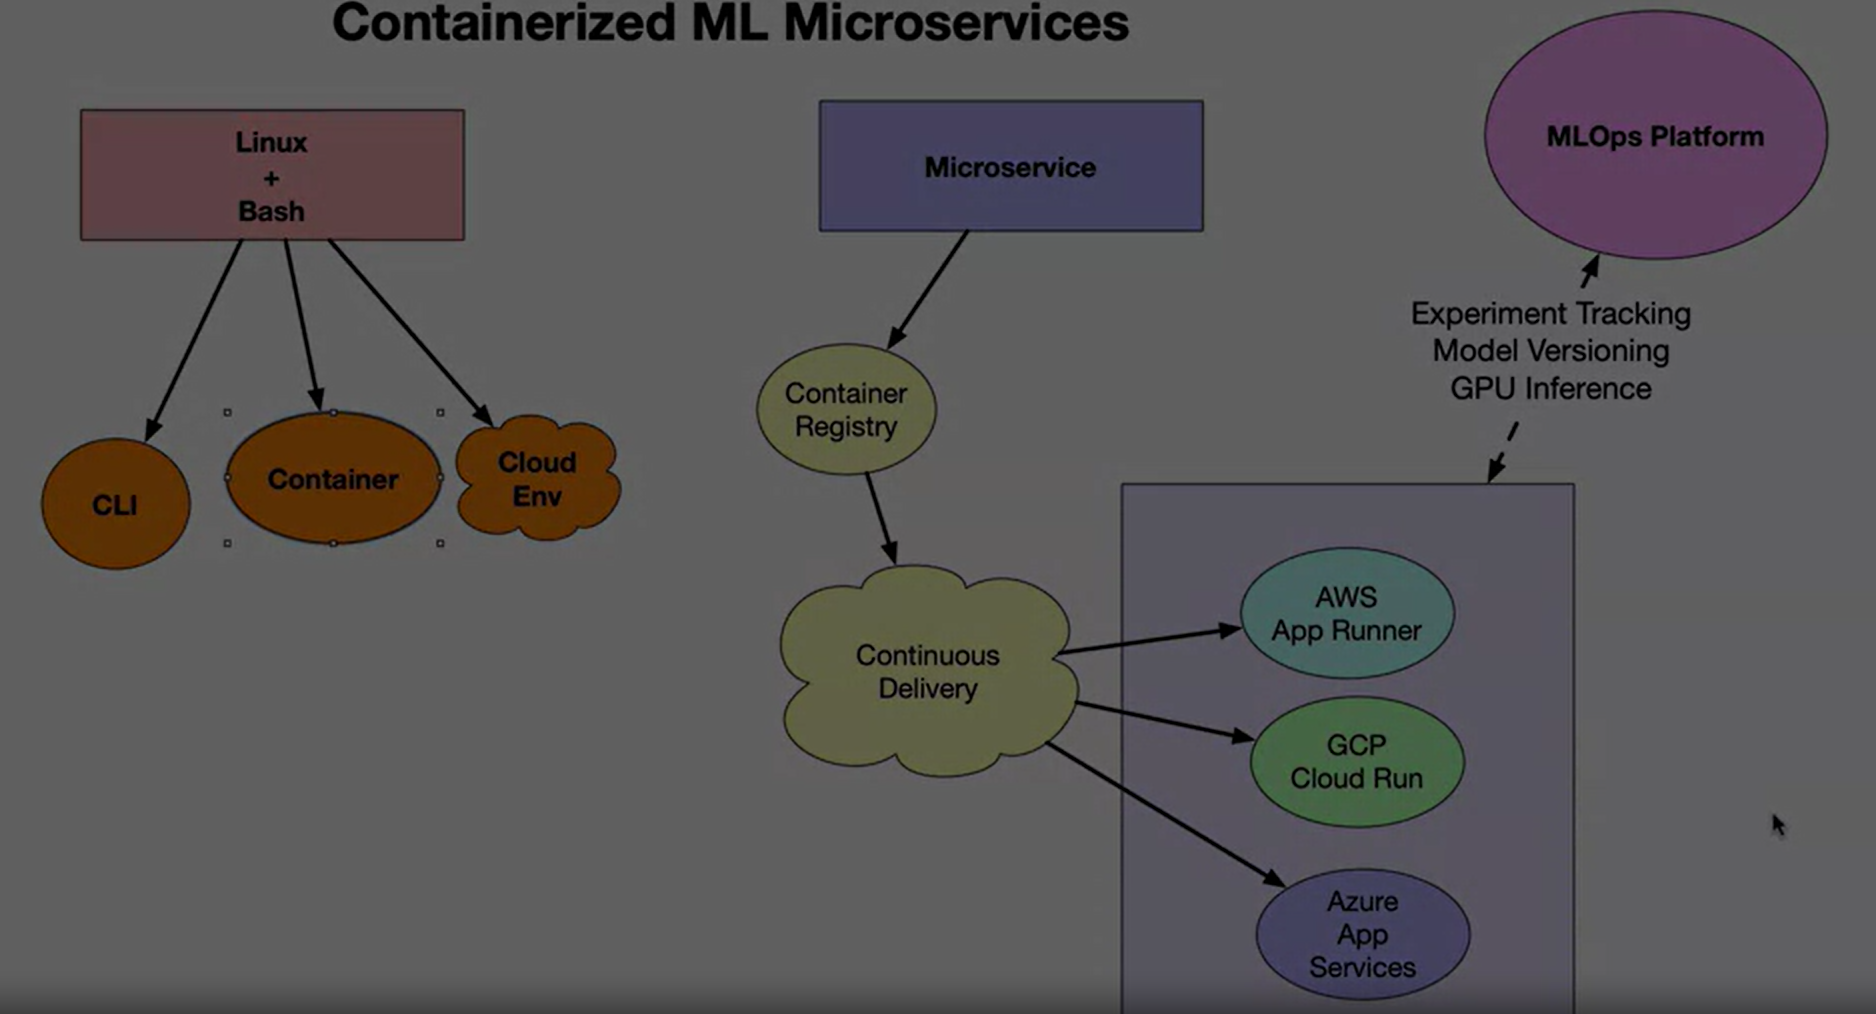
* the above picture shows the how the process of containerized ML microservices
  + first, on Linux + bash platform, we can build the container using CLI and push the contaniner images to a cloud environment, such as codebase. This can integrate github actions for workflow management for CI
  + then the docker images can be pushed in a the microservice framework using a container registry, integrated by a continuous delivery framework, such as AWS App Runner, GCP Cloud Run, or Azure App Services
  + we can integrate the MLOps platform for experiment tracking, model versioning and GPU inference to the CD framework on cloud
  
### Example of containerized microservice for CD on AWS
* Architecture
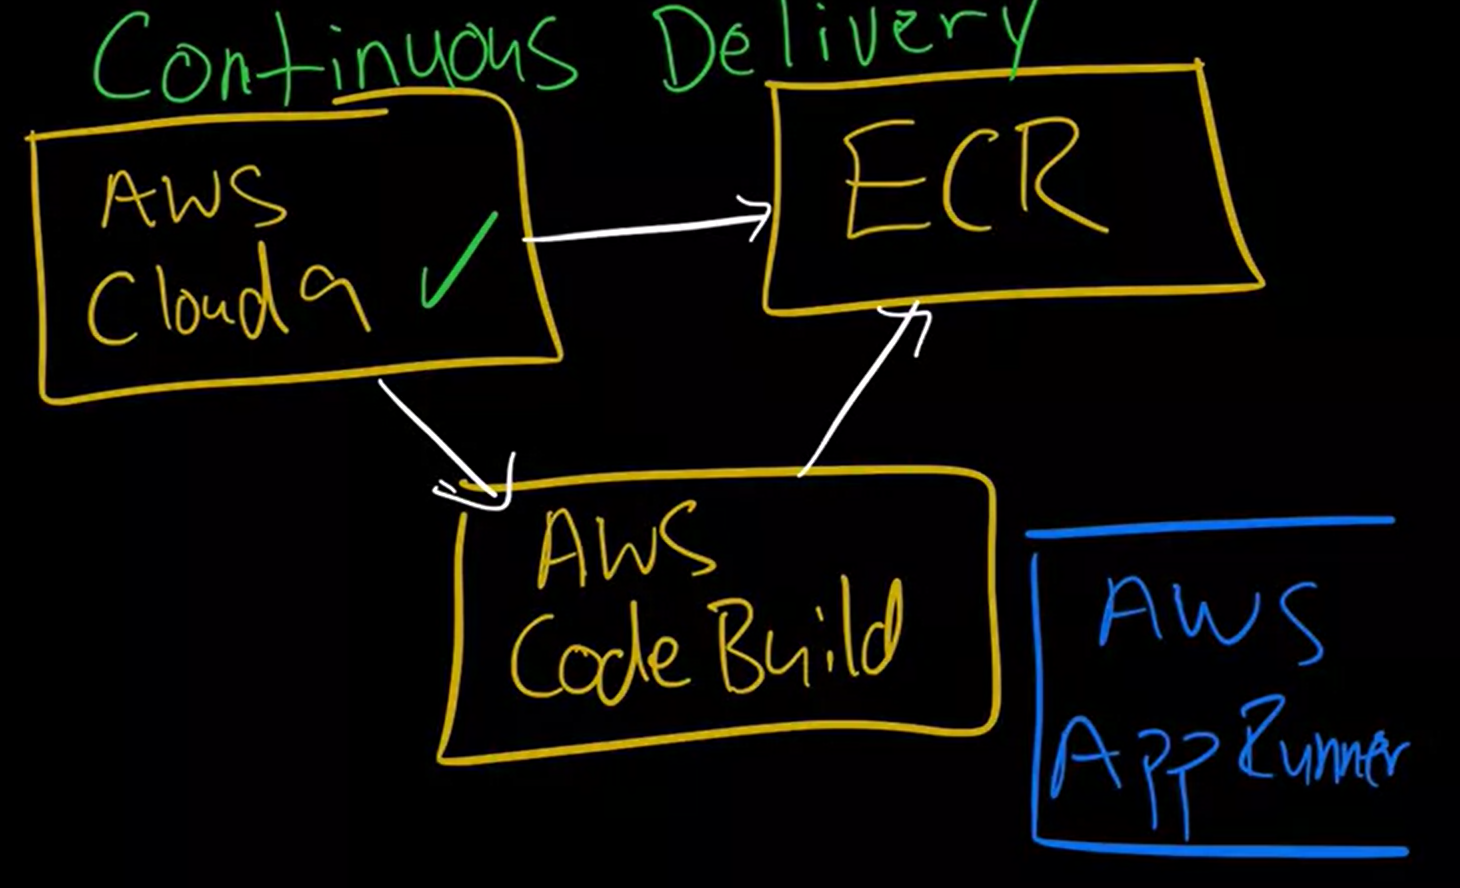
* basic components
  + clound9 for code development
  + ECR for docker registry
  + AWS code build for code repo
  + app runner for CD framework
* workflow
  + you can build the docker on AWS cloud9, push the docker image to ECR, and then directly deploy on AWS App Runner
  + in addition, you can also use AWS code build for continuous build when dokder is changed, and code build will push the new version of docker to ECR for you
* [github link](https://github.com/noahgift/fastapi)
* process
  + in cloud9, git clone the fastapi repo 
  + set up virtual environment on cloud9 and source it in .bashrc
  + install packages by `make install`
  + run main.py by `python main.py`. Open up a new terminal and use curl http://0.0.0.0:8000/add/3/3 to test the app is running
  + now, push the code to ECR. An easy way is to use console to create the ECR repo, and click "view push command" to copy and paste to cloud9 terminal to log into ECR
  + build docker image locally in cloud9 terminal and push docker image to ECR
  + go to AWS app runner, click 'create new service', and click the 'Amazon ECR'. Find the container of your ECR image, select it
  + in the next step, you can choose Automatic mode that app Runner monitors your registry and deploys a new version of your service for each image push
  + name the service, and other settings and then create and depploy the service
  
* code build
  + In AWS code build, create build project, and give a project name and description
  + select the source provide as github

### Example of MLOps on AWS
* create a ECR repo for code and model, and copy the push commands from the ECR repo console
* go to cloud9 and log in to ECR
* test locally and make sure the system works
* build the docker image locally
* tag the docker image and push to the ECR
* four ways to deploy a model
  + download
  + automal
  + build
  + provide a endpoint (REST API, for example)
  

## Rust

### General
* rust is built recently and has the best practice
  + packaging is easier then Python
  + perform and efficiency are better than Python
  + mutliple threading
  + safety and security
  + delivery of binary executable code is powerful
  + using github copilot is easy
  
### github template for Rust
* [github Rust template](https://github.com/noahgift/rust-new-project-template)
* to set up Rust environment, just type `curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs | sh
* to create a new project type `cargo new hello`

### Github template for MLOps
* [github mlops template](https://github.com/nogibjj/mlops-template)

### Amazon SageMaker Studio Lab
* check conda environments `conda env list`
* monitor GPU `nvidia-smi -l 1`
* can run aws cli such as `aws s3`
* AWS CloudShell
  + in AWS as a service that can access to AWS resources and tools from a browser
  + to get content of a web site using lynx
    + install by `sudo yum install lynx`
    + use `lynx -dump https://en.wikipedia.org/wiki/Albert_Einstein | less`
    + to get lines and bytes, use `| wc -l ` or `wc --bytes`
    
### AWS S3
* use s3 select to run sql queries
* in cli, get help for s3 command by filtering the help information using `aws s3 cp help | less | grep "aws s3 cp"`

## Data ingestion and transformation

### Batch vs. streaming job styles
* 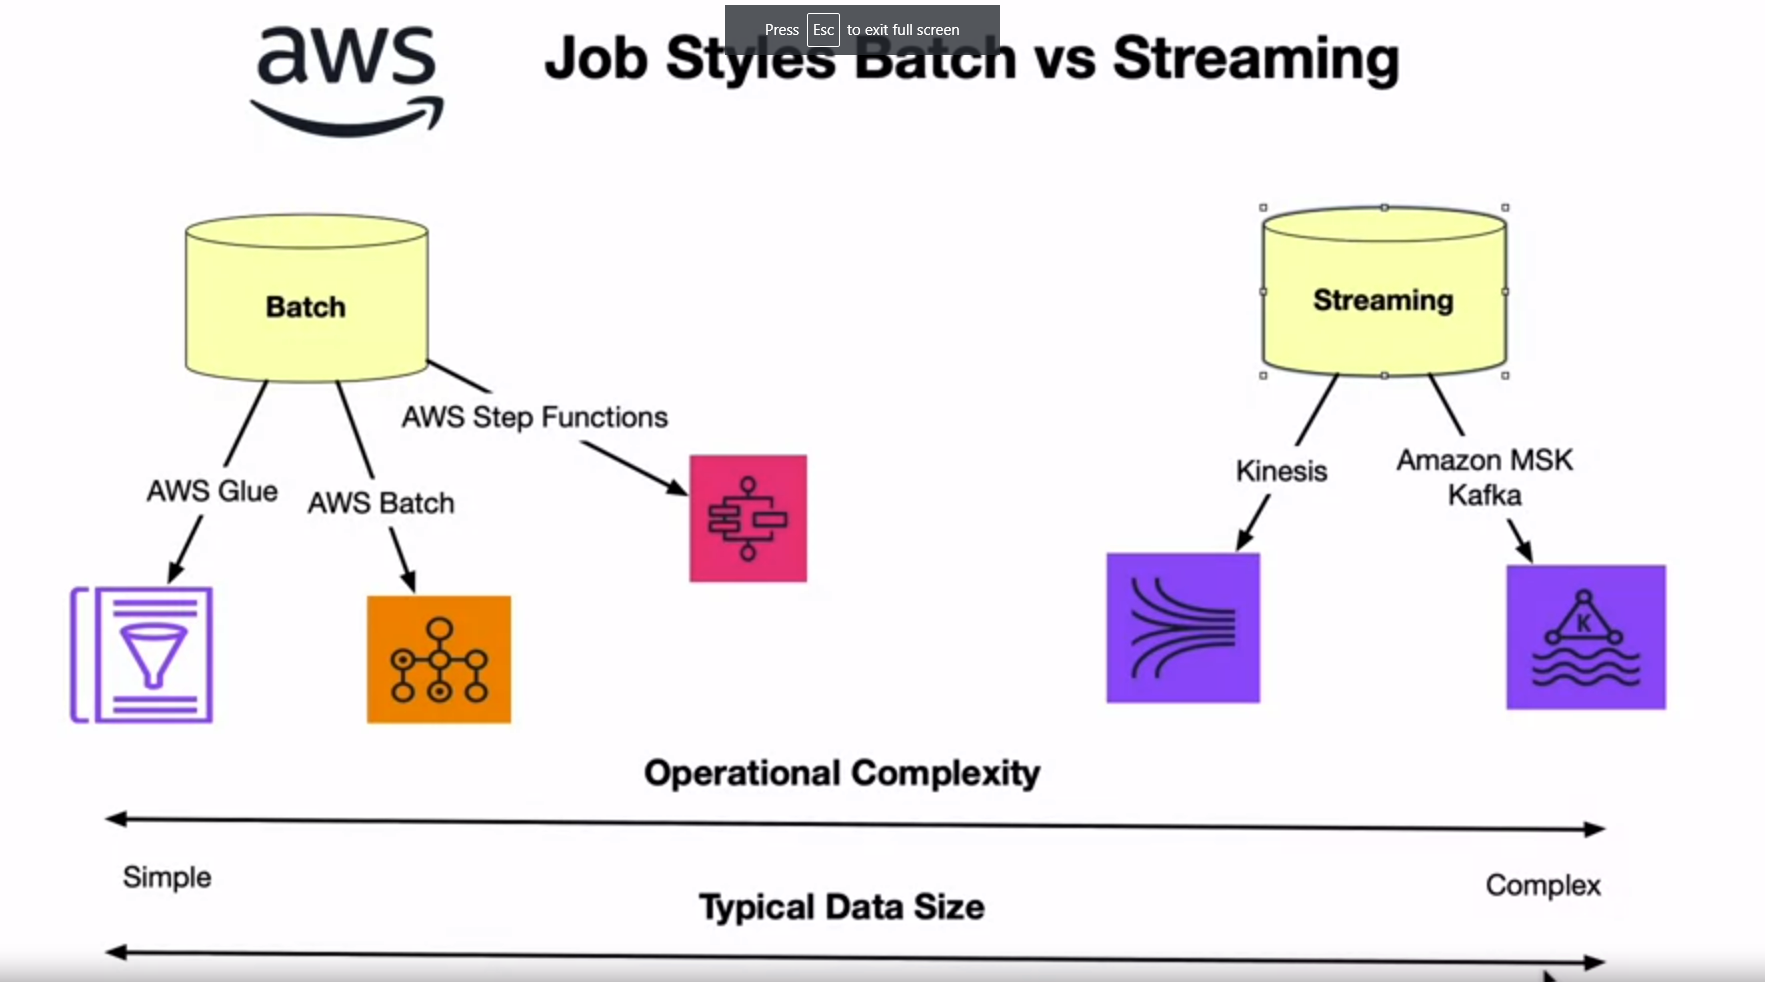

### Data ingestion and processng pipelines
* 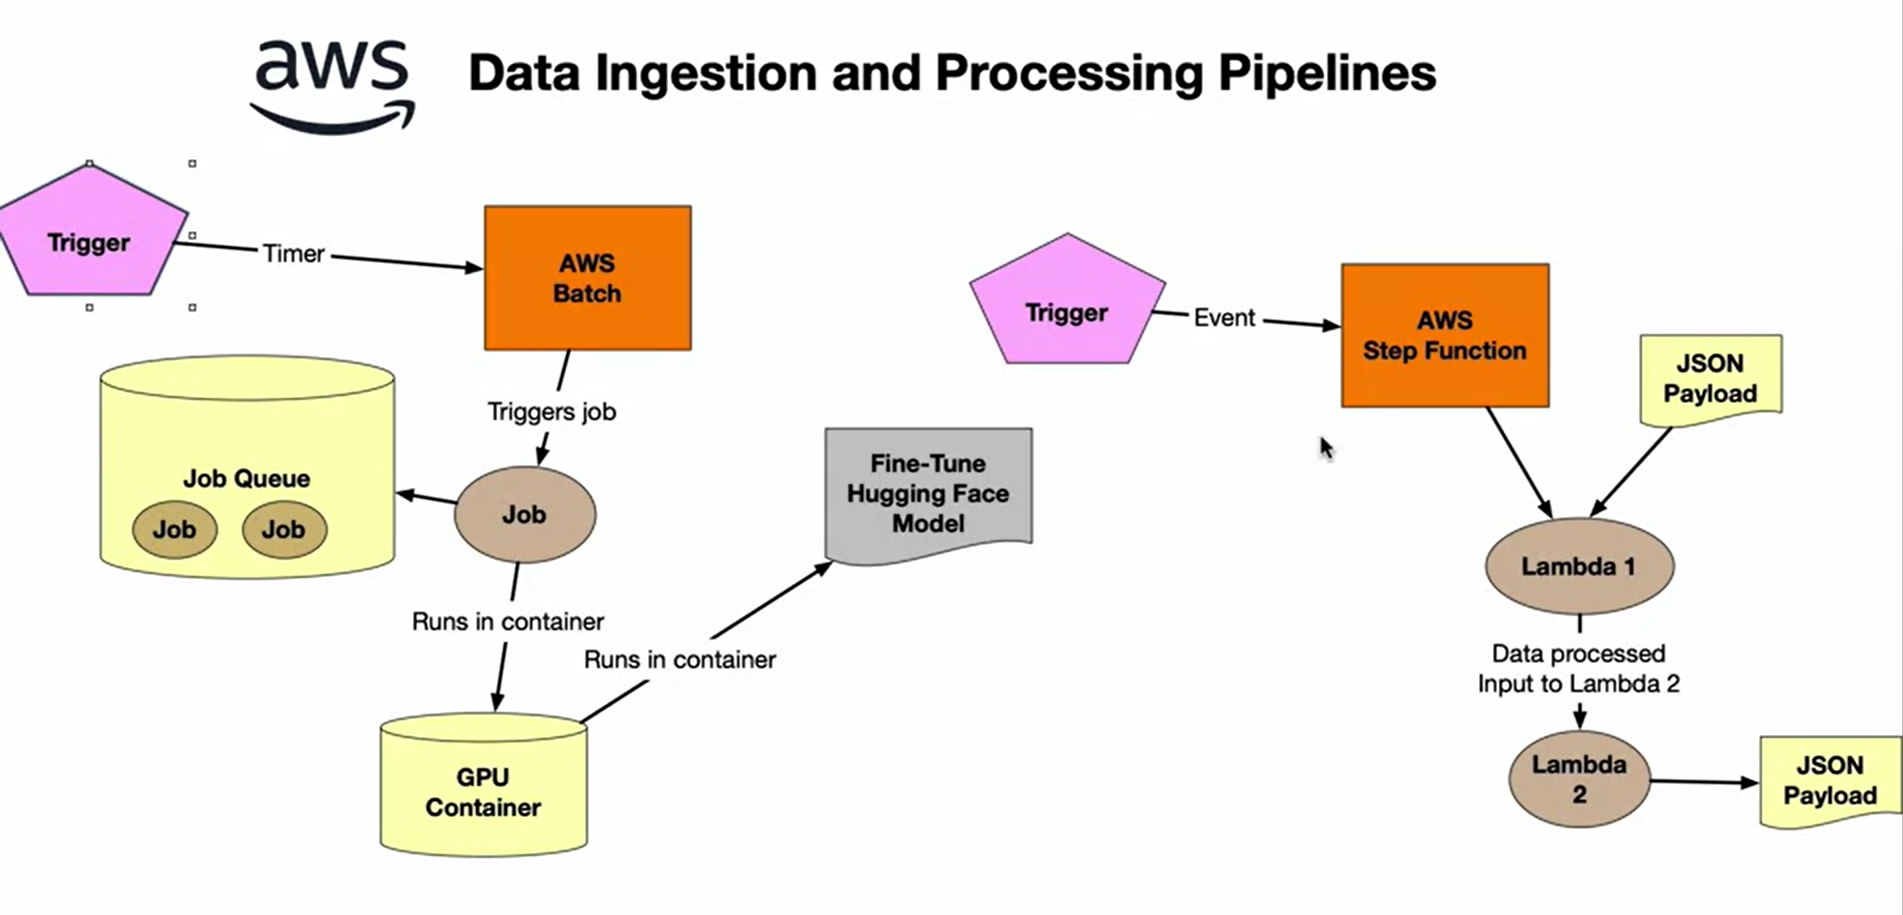
* AWS batch can be used to scale up jobs such as training models
* step functions are more used for ETL process to orchestrate complicated sequences / pipelines

### Transforming data in transit by AWS Glue
* 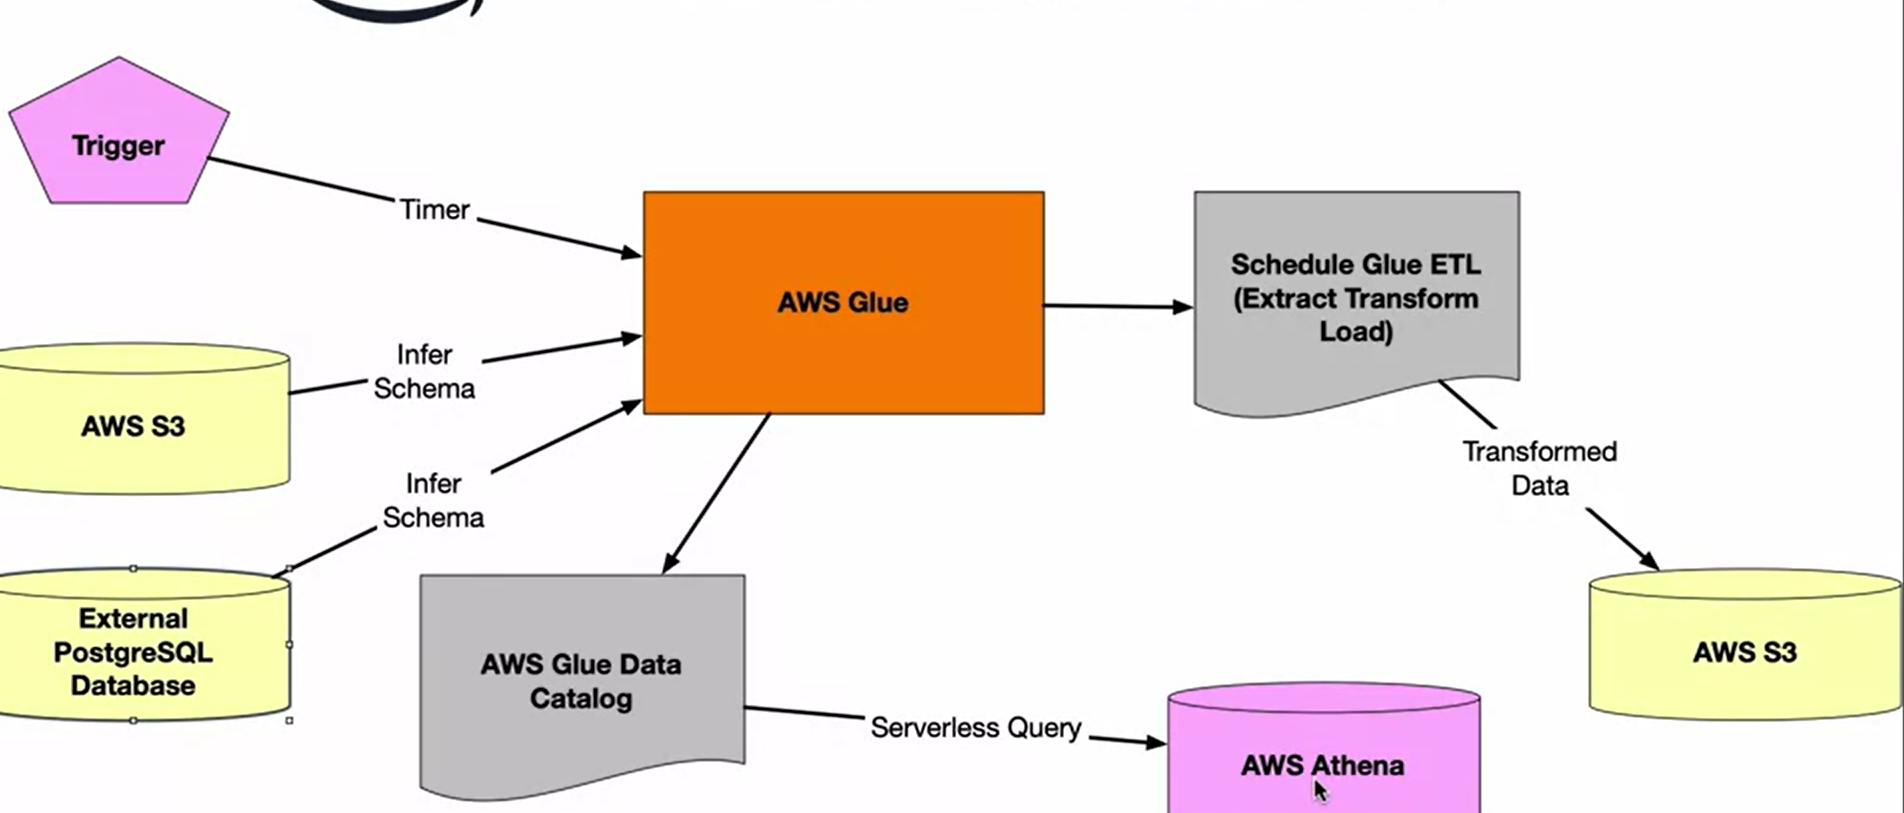

### AWS flavored containerized devops
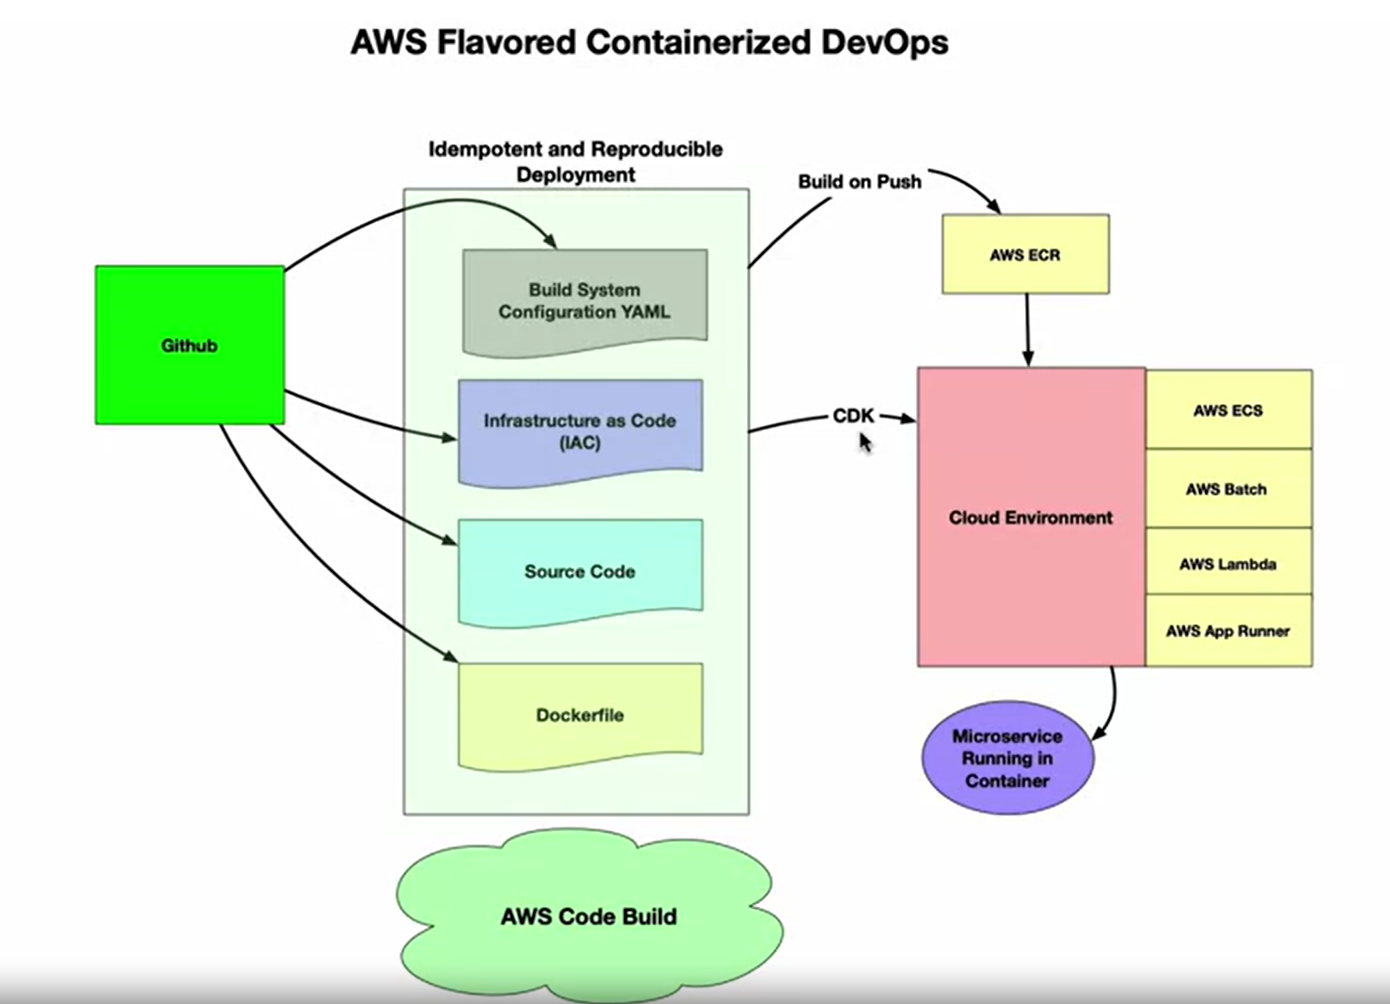
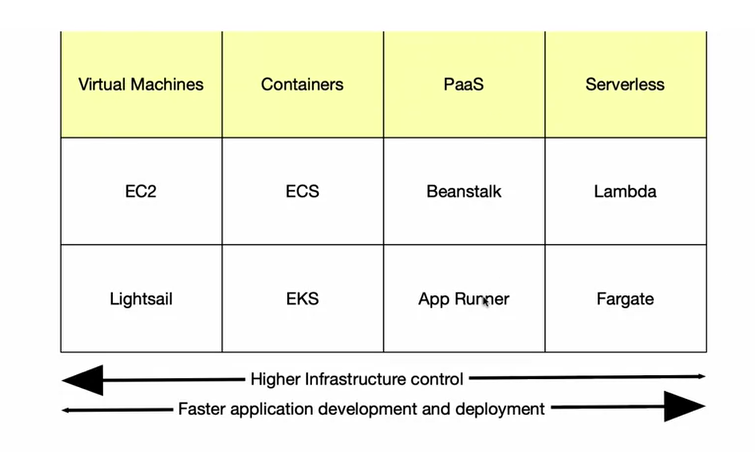

### deploy a hugging face pre-trained model to Amazon SageMaker
* [Check out how to deploy a hugging face pre-trained model to Amazon SageMaker:](https://studiolab.sagemaker.aws/import/github/aws/studio-lab-examples/blob/main/connect-to-aws/Access_AWS_from_Studio_Lab_Deployment.ipynb)

### Sagemaker workflow
* 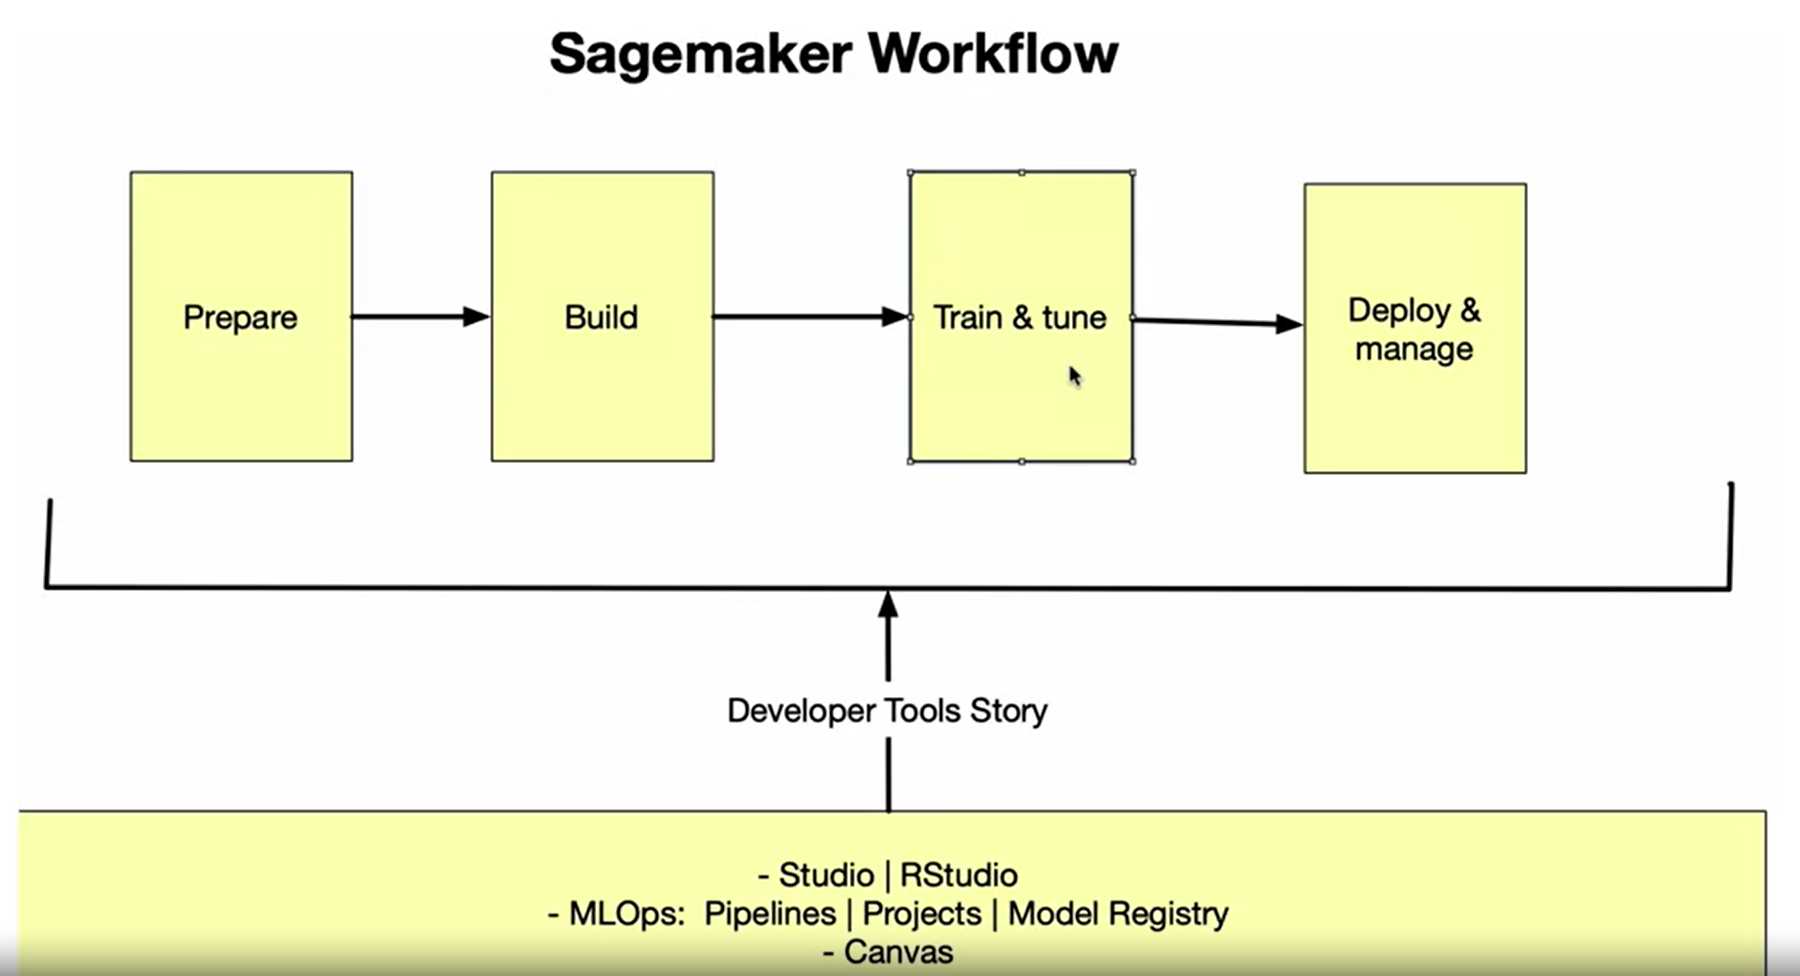
* [deploy models for inference](https://docs.aws.amazon.com/sagemaker/latest/dg/deploy-model.html)
* [Deploy a PyTorch model to AWS App Runner:](https://github.com/nogibjj/pytorch-fastapi-aws-apprunner)
